In [4]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
%matplotlib inline
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}
plt.rcParams['figure.figsize'] = (12, 12)

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
# generate some random cluster data
X, y = make_blobs(random_state=170, n_samples=600, centers = 5)
rng = np.random.RandomState(74)
# transform the data to be stretched
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)
# plot
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()


In [2]:





#4X.shape

id =  np.asarray( range(1, len(X)+1)  ) 
id
np.concatenate([X, id  ], axis=1)
#np.append(X, id, axis=1)
#X[: 5]

SyntaxError: invalid syntax (<ipython-input-2-83217ffd1a5d>, line 6)

In [ ]:
id 

In [ ]:
X.shape


In [ ]:
clusters


Text(0.5,1,'Numero de clusters  5')

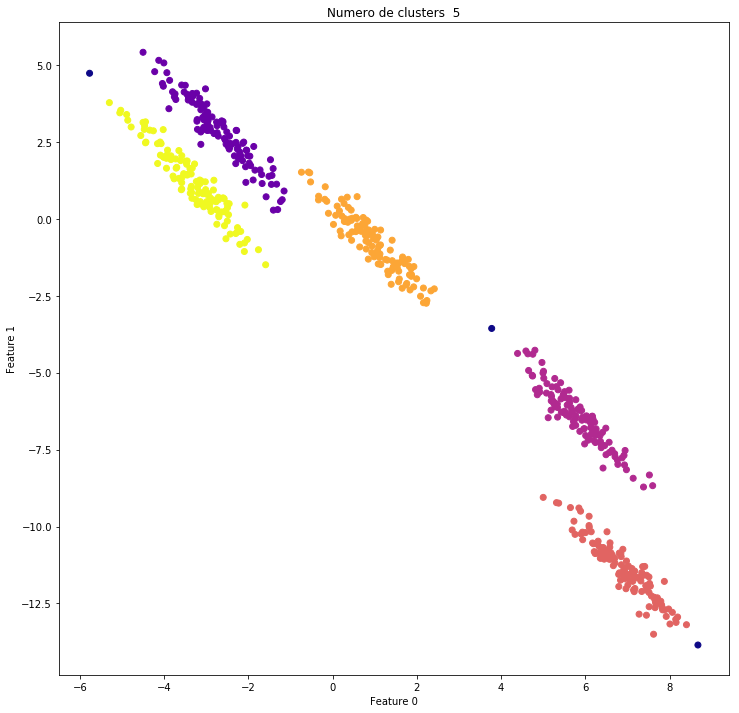

In [5]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# cluster the data into five clusters
dbscan = DBSCAN(eps=0.123, min_samples = 2)
clusters = dbscan.fit_predict(X_scaled)

labels = dbscan.labels_ 
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
  

# plot the cluster assignments
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap="plasma"  )
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.title('Numero de clusters  %d' % n_clusters_ )
 

In [7]:
new_df = pd.DataFrame( X  , columns=['X' , 'Y']) 
new_df['clusters'] = clusters  
new_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 3 columns):
X           600 non-null float64
Y           600 non-null float64
clusters    600 non-null int64
dtypes: float64(2), int64(1)
memory usage: 14.1 KB


In [8]:
import pandas as pd 

pd.DataFrame( data= X[:, 0], X[:, 1] , clusters  , columns=['X','Y','CLUSTER']  )

SyntaxError: positional argument follows keyword argument (<ipython-input-8-8b9b579f4a90>, line 3)

In [9]:
#pd.DataFrame( list( X[:, 0] )  
data_clustered = pd.DataFrame({'x':X[:,0],'y':X[:,1],'cluster': clusters})

In [10]:
clusters.dtype

dtype('int64')

Text(0.5,1,'Numero de clusters  5')

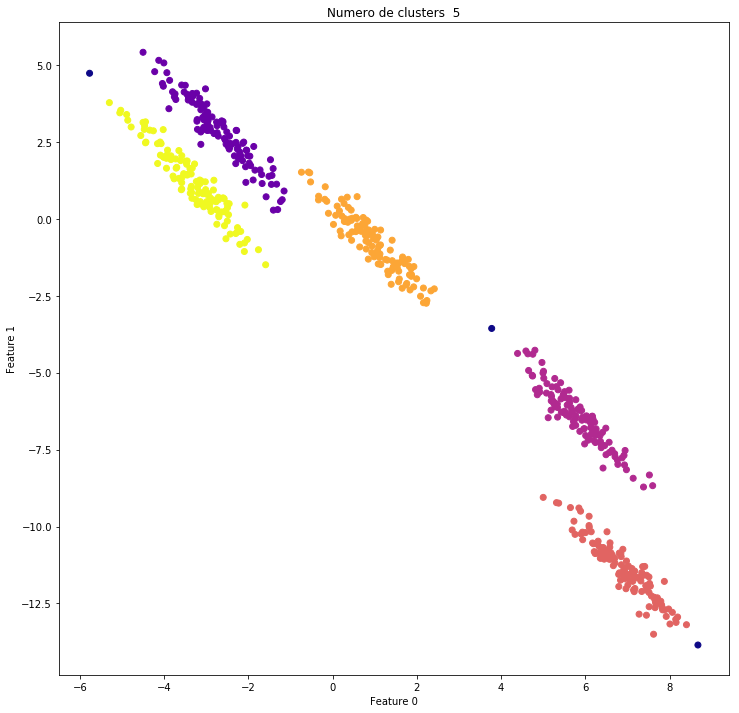

In [11]:

# plot the cluster assignments
plt.scatter(new_df.X , new_df.Y , c=new_df.clusters, cmap="plasma"  )
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.title('Numero de clusters  %d' % n_clusters_)
 


## Coordenadas paralelas




In [12]:
#from pandas.tools.plotting import parallel_coordinates
import pandas 
from pandas.plotting import parallel_coordinates

In [13]:
new_df

X          Y  clusters
0   -2.549591   2.564382         0
1    6.919673  -7.684989         1
2    6.595795 -11.060815         2
3    3.777644  -3.560102        -1
4    5.478495  -5.704121         1
5   -3.129210   3.745507         0
6    6.223192  -6.610973         1
7    1.651752  -2.252120         3
8    5.259986  -5.961198         1
9   -2.599742   0.684438         4
10  -2.743381   3.030184         0
11  -2.092766  -0.782600         4
12   5.001152  -9.051416         2
13  -3.059564   0.394438         4
14   6.497607 -10.893006         2
15   6.666225 -11.270552         2
16   1.868433  -1.865280         3
17   0.795333  -0.430258         3
18  -5.030363   3.530863         4
19   5.089528  -5.353735         1
20  -1.329099   1.129099         0
21   0.409762  -0.002934         3
22   6.638098 -10.924248         2
23   6.956508 -11.651302         2
24   0.853391  -0.771615         3
25  -3.918563   2.235202         4
26   6.395491 -10.868254         2
27   6.213161  -7.213987         1
28   1.092748  -0.896134         3
29  -3.015762   0.467109         4
..        ...        ...       ...
570 -3.354012   1.058308         4
571  4.917974  -5.628002         1
572  7.058375 -11.549712         2
573 -3.009522   3.381613         0
574 -2.025263  -0.667654         4
575 -3.059424   2.976101         0
576 -3.935538   2.074054         4
577 -2.761185   0.299859         4
578  1.309046  -1.699560         3
579 -2.531792  -0.645660         4
580  7.435374 -11.920264         2
581  6.408288  -6.938820         1
582 -0.334281   0.617597         3
583  5.211545  -5.458614         1
584  0.272373   0.502800         3
585 -2.956765   3.185365         0
586  6.350939  -7.038844         1
587 -5.052084   3.447657         4
588 -4.441482   3.154790         4
589 -2.545415   0.252351         4
590 -2.764318   0.558033         4
591  5.770955  -6.396468         1
592 -2.829553   0.940073         4
593 -2.445146   2.420223         0
594  1.117737  -0.864221         3
595 -2.094953  -1.059774         4
596  8.010198 -13.166932         2
597 -3.453205   1.884234         4
598  6.934616 -11.696882         2
599  5.335471  -6.015518         1

[600 rows x 3 columns]

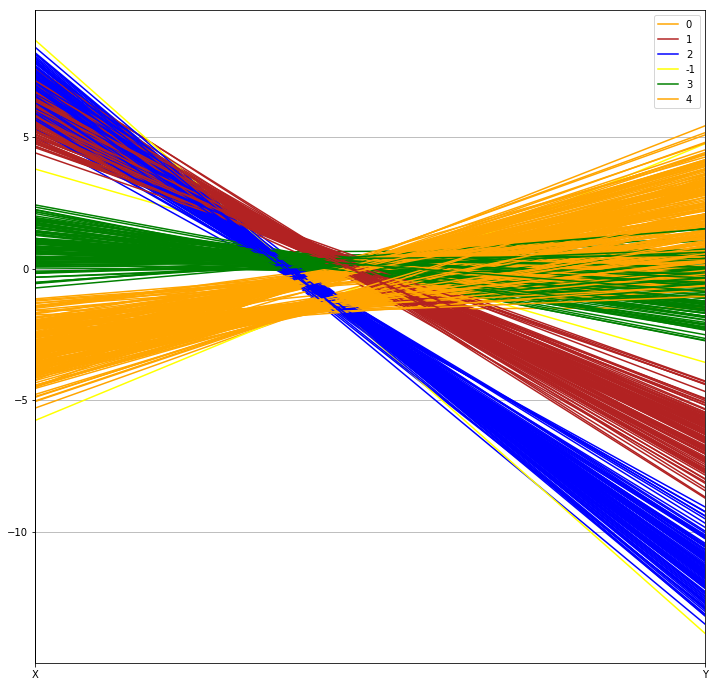

In [14]:
# Make the plot
parallel_coordinates(new_df, 'clusters'  , color=('orange', 'firebrick' , 'blue' , 'yellow' , 'green')   )
plt.show()

In [ ]:
import plotly.plotly as py
import plotly.graph_objs as go

plotly.tools.set_credentials_file(username='slotbite', api_key='GYgRt3eXz6IdiIy3k7sO')

import pandas as pd  

df = pd.read_csv("https://raw.githubusercontent.com/bcdunbar/datasets/master/parcoords_data.csv")

data = [
    go.Parcoords(
        line = dict(color = df['colorVal'],
                   colorscale = 'Jet',
                   showscale = True,
                   reversescale = True,
                   cmin = -4000,
                   cmax = -100),
        dimensions = list([
            dict(range = [32000,227900],
                 constraintrange = [100000,150000],
                 label = 'Block Height', values = df['blockHeight']),
            dict(range = [0,700000],
                 label = 'Block Width', values = df['blockWidth']),
            dict(tickvals = [0,0.5,1,2,3],
                 ticktext = ['A','AB','B','Y','Z'],
                 label = 'Cyclinder Material', values = df['cycMaterial']),
            dict(range = [-1,4],
                 tickvals = [0,1,2,3],
                 label = 'Block Material', values = df['blockMaterial']),
            dict(range = [134,3154],
                 visible = True,
                 label = 'Total Weight', values = df['totalWeight']),
            #dict(range = [9,19984],
            #     label = 'Assembly Penalty Weight', values = df['assemblyPW']),
            dict(range = [49000,568000],
                 label = 'Height st Width', values = df['HstW']),
            dict(range = [-28000,196430],
                 label = 'Min Height Width', values = df['minHW']),
            dict(range = [98453,501789],
                 label = 'Min Width Diameter', values = df['minWD']),
            dict( 
                 label = 'RF Block', values = df['rfBlock'])
        ])
    )
]

py.iplot(data, filename = 'parcoords-advanced')

In [16]:
import plotly.plotly as py
import plotly.graph_objs as go

#plotly.tools.set_credentials_file(username='slotbite', api_key='GYgRt3eXz6IdiIy3k7sO')

import pandas as pd  

df = pd.read_csv("https://raw.githubusercontent.com/bcdunbar/datasets/master/parcoords_data.csv")

data = [
    go.Parcoords(
        line = dict(color = df['colorVal'],
                   colorscale = 'Jet',
                   showscale = True,
                   reversescale = True,
                   cmin = -4000,
                   cmax = -100),
        dimensions = list([
            dict(range = [32000,227900],
                 constraintrange = [100000,150000],
                 label = 'Block Height', values = df['blockHeight']),
            dict(range = [0,700000],
                 label = 'Block Width', values = df['blockWidth']),
            dict(tickvals = [0,0.5,1,2,3],
                 ticktext = ['A','AB','B','Y','Z'],
                 label = 'Cyclinder Material', values = df['cycMaterial']),
            dict(range = [-1,4],
                 tickvals = [0,1,2,3],
                 label = 'Block Material', values = df['blockMaterial']),
            dict(range = [134,3154],
                 visible = True,
                 label = 'Total Weight', values = df['totalWeight']),
            #dict(range = [9,19984],
            #     label = 'Assembly Penalty Weight', values = df['assemblyPW']),
            dict(range = [49000,568000],
                 label = 'Height st Width', values = df['HstW']),
            dict(range = [-28000,196430],
                 label = 'Min Height Width', values = df['minHW']),
            dict(range = [98453,501789],
                 label = 'Min Width Diameter', values = df['minWD']),
            dict( 
                 label = 'RF Block', values = df['rfBlock'])
        ])
    )
]

py.iplot(data, filename = 'parcoords-advanced')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~slotbite/0 or inside your plot.ly account where it is named 'parcoords-advanced'
